<a href="https://colab.research.google.com/github/caio-torres-seares/reducao-dimensionalidade-imagens/blob/main/reducao_dimensionalidade_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()  # escolhe o arquivo no diálogo
fname = next(iter(uploaded))
print("Carregado:", fname)

Saving lena colorida.png to lena colorida (1).png
Carregado: lena colorida (1).png


In [2]:
# === 2) instalar Pillow (apenas para leitura/extração do PNG) ===
!pip install -q pillow
from PIL import Image

In [3]:
# === 3) converter PNG -> PPM (P3 ASCII) usando PIL para extrair pixels ===
img = Image.open(fname).convert('RGB')   # força RGB (remove alpha)
w, h = img.size
pixels = list(img.getdata())

ppm_name = "input.ppm"
with open(ppm_name, 'w') as f:
    f.write("P3\n")
    f.write(f"# generated from {fname}\n")
    f.write(f"{w} {h}\n")
    f.write("255\n")
    for i, (r,g,b) in enumerate(pixels):
        f.write(f"{r} {g} {b} ")
        if (i+1) % w == 0:
            f.write("\n")
print("PPM gerado:", ppm_name)


PPM gerado: input.ppm


In [4]:
# === 4) Funções puras em Python para ler PPM (P3), converter e salvar PGM ===
def carregar_ppm_p3(nome_arquivo):
    with open(nome_arquivo, 'r') as f:
        tipo = f.readline().strip()
        if tipo != "P3":
            raise ValueError("Esperado P3 (PPM ASCII).")
        linha = f.readline().strip()
        while linha.startswith('#'):
            linha = f.readline().strip()
        largura, altura = map(int, linha.split())
        max_val = int(f.readline().strip())
        valores = []
        for token in f.read().split():
            valores.append(int(token))
        pixels = []
        for i in range(0, len(valores), 3):
            pixels.append((valores[i], valores[i+1], valores[i+2]))
        return largura, altura, max_val, pixels

In [5]:
def salvar_pgm_p2(nome_arquivo, largura, altura, max_val, pixels_gray):
    with open(nome_arquivo, 'w') as f:
        f.write("P2\n")
        f.write(f"{largura} {altura}\n")
        f.write(f"{max_val}\n")
        for i, val in enumerate(pixels_gray):
            f.write(str(val) + " ")
            if (i+1) % largura == 0:
                f.write("\n")

In [6]:
def rgb_para_cinza(r,g,b):
    return int(0.299*r + 0.587*g + 0.114*b)

In [7]:
def gray_para_binario(gray, limiar=128):
    return 255 if gray >= limiar else 0

In [8]:
# === 5) usar as funções para gerar grayscale e binário ===
w, h, maxv, pixels_rgb = carregar_ppm_p3(ppm_name)
pixels_gray = [rgb_para_cinza(r,g,b) for (r,g,b) in pixels_rgb]
salvar_pgm_p2("saida_cinza.pgm", w, h, 255, pixels_gray)

pixels_bin = [gray_para_binario(g, limiar=128) for g in pixels_gray]
salvar_pgm_p2("saida_binaria.pgm", w, h, 255, pixels_bin)
print("Geradas: saida_cinza.pgm e saida_binaria.pgm")

Geradas: saida_cinza.pgm e saida_binaria.pgm


In [16]:
# === 6) converter PGM de volta para PNG para visualizar no Colab ===
img_gray = Image.new('L', (w, h))
img_gray.putdata(pixels_gray)
img_gray.save("saida_cinza.png")

img_bin = Image.new('L', (w, h))
img_bin.putdata(pixels_bin)
img_bin.save("saida_binaria.png")

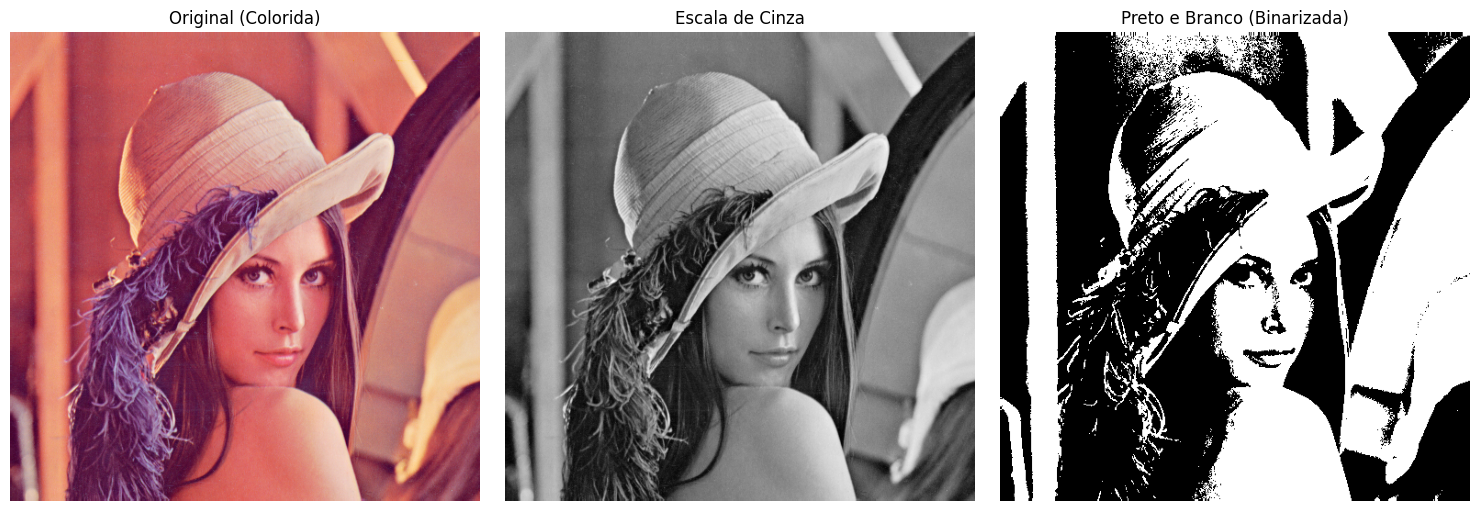

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1) Original
axes[0].imshow(img)
axes[0].set_title("Original (Colorida)")
axes[0].axis("off")

# 2) Cinza
axes[1].imshow(img_gray, cmap="gray")
axes[1].set_title("Escala de Cinza")
axes[1].axis("off")

# 3) Binária
axes[2].imshow(img_bin, cmap="gray")
axes[2].set_title("Preto e Branco (Binarizada)")
axes[2].axis("off")

plt.tight_layout()
plt.show()